In [1]:
!pip install -U mplsoccer

  Obtaining dependency information for mplsoccer from https://files.pythonhosted.org/packages/2e/64/2f7ca21b33d0bf9fe48a65103782e7b14b412efb7e8bac5ecccf063d0dd4/mplsoccer-1.2.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/79.4 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/79.4 kB ? eta -:--:--
   ---------- ----------------------------- 20.5/79.4 kB 165.2 kB/s eta 0:00:01
   ---------------------------------------- 79.4/79.4 kB 886.5 kB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen

pd.set_option('display.max_columns', 500)

In [3]:
parser = Sbopen()
df_match = parser.match(competition_id=43, season_id=106)
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         64 non-null     int64         
 1   match_date                       64 non-null     datetime64[ns]
 2   kick_off                         64 non-null     datetime64[ns]
 3   home_score                       64 non-null     int64         
 4   away_score                       64 non-null     int64         
 5   match_status                     64 non-null     object        
 6   match_status_360                 64 non-null     object        
 7   last_updated                     64 non-null     datetime64[ns]
 8   last_updated_360                 64 non-null     datetime64[ns]
 9   match_week                       64 non-null     int64         
 10  competition_id                   64 non-null     int64         


In [4]:
df_match.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3857256,2022-12-02,2022-12-02 21:00:00,2,3,available,available,2023-02-17 23:45:15.306706,2023-04-26 23:49:58.956186,3,43,International,FIFA World Cup,106,2022,786,Serbia,male,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,773,Switzerland,male,G,221,Switzerland,2832,Murat Yakin,Murat Yakin,1974-09-15,221,Switzerland,1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,1121.0,Fernando Andrés Rapallini,11.0,Argentina
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,792,Australia,male,None,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
2,3857257,2022-11-30,2022-11-30 17:00:00,1,0,available,available,2023-04-28 17:13:10.958725,2023-06-20 11:04:37.638969,3,43,International,FIFA World Cup,106,2022,792,Australia,male,D,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,776,Denmark,male,D,61,Denmark,255,Kasper Hjulmand,Kasper Hjulmand,1972-04-09,61,Denmark,1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2311.0,Mustapha Ghorbal,4.0,Algeria
3,3857258,2022-11-24,2022-11-24 21:00:00,2,0,available,available,2023-06-24 17:17:27.911026,2023-07-11 14:56:31.096588,1,43,International,FIFA World Cup,106,2022,781,Brazil,male,G,31,Brazil,4704,Telê Santana da Silva,Telê Santana,1931-07-26,31,Brazil,786,Serbia,male,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
4,3857288,2022-11-26,2022-11-26 12:00:00,0,1,available,available,2023-02-28 21:25:20.888552,2023-04-27 00:30:07.835815,2,43,International,FIFA World Cup,106,2022,777,Tunisia,male,D,232,Tunisia,1001303,Jalel Kadri,Jalel Kadri,NaT,232,Tunisia,792,Australia,male,D,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,225.0,Daniel Siebert,85.0,Germany


In [5]:
df_matches = {}
for i, id in enumerate(df_match['match_id']):
  df_matches[id] = {}
  df_matches[id]['event'], df_matches[id]['related'], df_matches[id]['freeze'], df_matches[id]['tactic'] = parser.event(id)

In [6]:
df_matches[3857288]['event'][df_matches[3857288]['event']['type_name'] == 'Shot'].head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,outcome_id,outcome_name,counterpress,aerial_won,ball_recovery_recovery_failure,pass_switch,out,dribble_nutmeg,pass_cross,shot_statsbomb_xg,shot_first_time,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,off_camera,pass_cut_back,injury_stoppage_in_chain,pass_deflected,block_deflection,pass_assisted_shot_id,pass_shot_assist,end_z,shot_key_pass_id,foul_committed_offensive,foul_committed_card_id,foul_committed_card_name,foul_won_defensive,foul_committed_advantage,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,dribble_overrun
225,f7f89232-029c-46d3-9b33-6171761da364,226,1,00:05:35.148000,5,35,15,0.037121,3857288,16,Shot,792,Australia,3,From Free Kick,792,Australia,None,28370.0,Fran Karačić,2.0,Right Back,NaN,NaN,NaN,NaN,NaN,NaN,91.8,41.1,40.0,Right Foot,87.0,Open Play,90.9,41.2,1.0,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015131,True,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,079ee5e7-8f88-419b-874f-08f5f6d45c07,816,1,00:20:20.141000,20,20,43,1.158633,3857288,16,Shot,777,Tunisia,4,From Throw In,777,Tunisia,None,9236.0,Mohamed Dräger,7.0,Right Wing Back,NaN,NaN,NaN,NaN,NaN,NaN,120.0,40.4,40.0,Right Foot,87.0,Open Play,92.0,42.5,NaN,98.0,Off T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029704,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,7b76477e-90f5-4ef8-a2e9-538a3500400b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,3af59ce2-13dd-4ef4-b999-35444cb60d7c,856,1,00:22:50.680000,22,50,47,1.104271,3857288,16,Shot,792,Australia,4,From Throw In,792,Australia,None,33492.0,Mitchell Thomas Duke,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.6,37.0,Head,87.0,Open Play,110.1,32.5,NaN,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044595,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,787614d6-21dd-40c6-9fd7-be27b59bdc71,879,1,00:26:06.836000,26,6,50,0.095529,3857288,16,Shot,792,Australia,3,From Free Kick,792,Australia,None,33492.0,Mitchell Thomas Duke,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,111.4,34.8,37.0,Head,87.0,Open Play,110.7,34.3,NaN,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039484,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959fe1f8-14c4-4f1f-be78-7642c520ee21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,0053d038-426b-4756-b8e3-67355127786c,1073,1,00:33:45.687000,33,45,64,0.629841,3857288,16,Shot,792,Australia,2,From Corner,792,Australia,None,5490.0,Jackson Irvine,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,47.2,40.0,Right Foot,87.0,Open Play,114.3,48.2,NaN,98.0,Off T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075431,True,89.0,Backheel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,e1ac1a22-6c63-4700-a85c-3b8328d9de74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_matches[3857288]['event'].shape

(3360, 70)

In [8]:
df_matches[3869321]['event'][df_matches[3869321]['event']['type_name'] == 'Shot']['sub_type_name'].unique()

array(['Open Play', 'Free Kick', 'Penalty'], dtype=object)

In [9]:
df_shot = pd.DataFrame(columns=['x', 'y', 'outcome_name', 'shot_statsbomb_xg'])

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4) & (df_matches[id]['event'].sub_type_name	== 'Open Play')
  shots_temp = df_matches[id]['event'].loc[mask_shot, ['x', 'y', 'outcome_name', 'shot_statsbomb_xg']]
  df_shot = pd.concat([df_shot, shots_temp]).reset_index(drop=True)

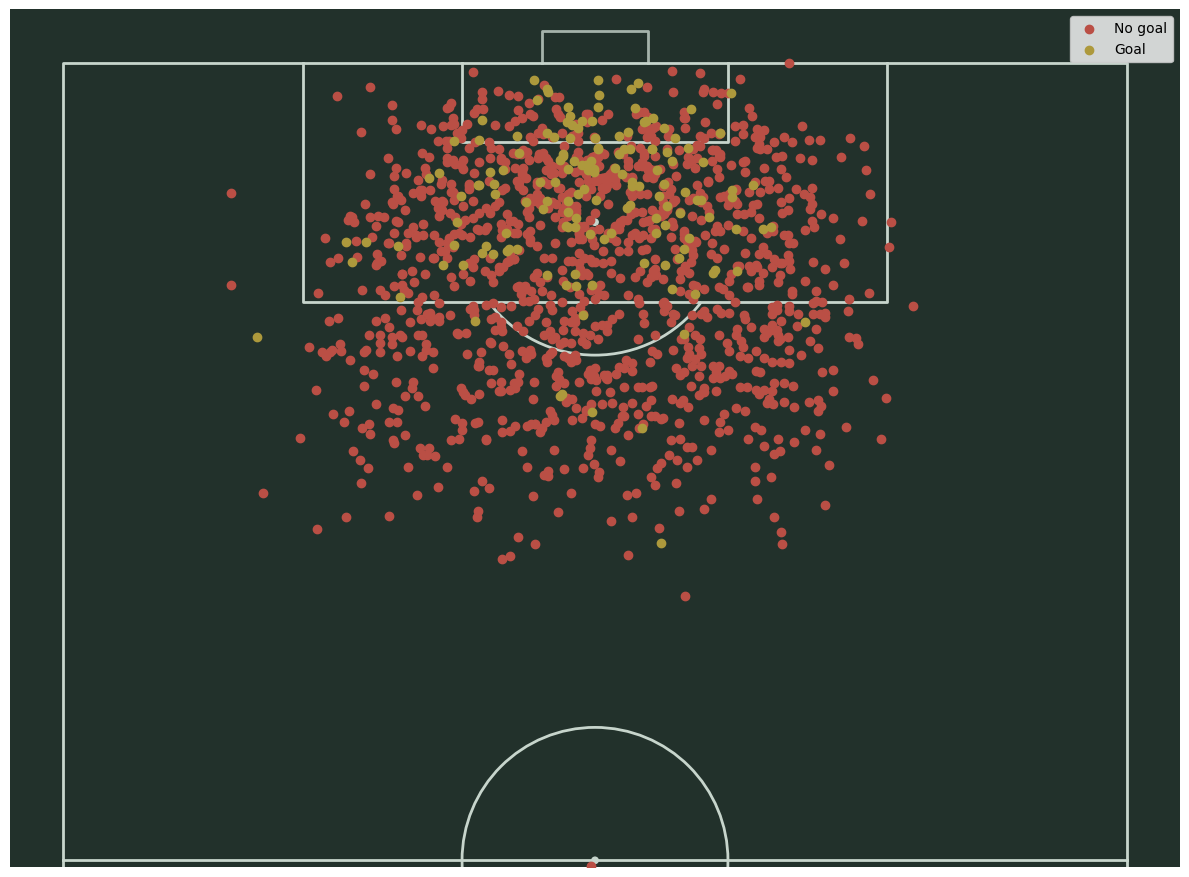

In [10]:
df_goals = df_shot[df_shot.outcome_name == 'Goal'].copy()
df_non_goal_shots = df_shot[df_shot.outcome_name != 'Goal'].copy()

# setup the pitch
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='#22312b', line_color='#c7d5cc')  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='#ba4f45',
                    marker='o',
                    ax=ax, label="No goal")

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#ad993c',
                    marker='o',
                    ax=ax, label="Goal")

plt.legend(loc='best')
plt.show()

In [11]:
import math

def calculate_angle(x, y):
  # 44 and 36 is the location of each goal post
  g0 = [120, 44]
  p = [x, y]
  g1 = [120, 36]

  v0 = np.array(g0) - np.array(p)
  v1 = np.array(g1) - np.array(p)

  angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
  return(abs(np.degrees(angle)))

def calculate_distance(x, y):
  x_dist = 120-x
  y_dist = 0
  if (y<36):
    y_dist = 36-y
  elif (y>44):
    y_dist = y-44
  return math.sqrt(x_dist**2 + y_dist**2)

In [12]:
df_shot['angle'] = df_shot.apply(lambda row:calculate_angle(row['x'], row['y']), axis=1)
df_shot['distance'] = df_shot.apply(lambda row:calculate_distance(row['x'], row['y']), axis=1)

In [13]:
df_shot['goal'] = df_shot.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [14]:
df_shot.head()

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal
0,96.0,38.8,Blocked,0.036566,18.879548,24.00000,0
1,113.1,40.7,Saved,0.353289,59.821068,6.90000,0
2,103.8,41.9,Saved,0.069527,27.397542,16.20000,0
3,112.2,36.8,Off T,0.081609,48.565404,7.80000,0
4,97.8,51.5,Post,0.030002,16.255762,23.43267,0


In [15]:
df_shot.groupby('goal').mean()

C:\Users\User\AppData\Local\Temp\ipykernel_9120\2053373446.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_shot.groupby('goal').mean()


,x,y,shot_statsbomb_xg,angle,distance
goal,,,,,
0,104.094156,39.973539,0.078670,24.603812,17.339943
1,109.753333,39.596000,0.259755,40.928138,10.902455


In [16]:
import altair as alt

fig = alt.Chart(df_shot).mark_point().encode(
  x='angle',y='goal')

fig + fig.transform_regression('angle','goal').mark_line()

alt.LayerChart(...)

In [17]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [18]:
fig = alt.Chart(df_shot).mark_point().encode(
  x='distance',y='goal')

fig + fig.transform_regression('distance','goal').mark_line()

alt.LayerChart(...)

In [19]:
df_shot['distance'].corr(df_shot['goal'])

-0.2459228329975418

In [20]:
df_shot['angle'].corr(df_shot['goal'])

0.3116086948720842

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

model_names = ['Linear', 'Logistic']
models = {}
models['Linear'] = {}
models['Linear']['model'] = LinearRegression()
models['Logistic'] = {}
models['Logistic']['model'] = LogisticRegression()

In [22]:
X = df_shot[['angle', 'distance']]
y = df_shot['goal']

In [23]:
from sklearn import metrics
for mod in model_names:
  models[mod]['model'].fit(X, y)
  if mod == 'Logistic':
    models[mod]['y_pred'] = models[mod]['model'].predict_proba(X)[:, 1]
  else:
    models[mod]['y_pred'] = models[mod]['model'].predict(X)

  models[mod]['r2_score'] = metrics.r2_score(y, models[mod]['y_pred'])
  print("R2 of model {}: {}".format(mod, models[mod]['r2_score']))

R2 of model Linear: 0.09901547697233781
R2 of model Logistic: 0.09565489627052592


In [24]:
metrics.r2_score(y, df_shot['shot_statsbomb_xg'])

0.1997968322836815

In [25]:
models[mod]['model'].predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
models[mod]['model'].predict_proba(X)

array([[0.95993315, 0.04006685],
       [0.70472823, 0.29527177],
       [0.91485483, 0.08514517],
       ...,
       [0.68147038, 0.31852962],
       [0.96699581, 0.03300419],
       [0.87333062, 0.12666938]])

In [27]:
df_shot['xG_Linear'] = models['Linear']['y_pred']
df_shot['xG_Logistic'] = models['Logistic']['y_pred']

In [28]:
df_shot.head()

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal,xG_Linear,xG_Logistic
0,96.0,38.8,Blocked,0.036566,18.879548,24.00000,0,0.052939,0.040067
1,113.1,40.7,Saved,0.353289,59.821068,6.90000,0,0.303467,0.295272
2,103.8,41.9,Saved,0.069527,27.397542,16.20000,0,0.114825,0.085145
3,112.2,36.8,Off T,0.081609,48.565404,7.80000,0,0.243340,0.228742
4,97.8,51.5,Post,0.030002,16.255762,23.43267,0,0.040711,0.039246


In [29]:
df_shot.loc[df_shot['xG_Linear'] < 0]

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal,xG_Linear,xG_Logistic
68,84.3,34.2,Saved,0.007537,12.463718,35.745349,0,-0.007185,0.014401
85,86.3,31.2,Blocked,0.010592,12.691578,34.040123,0,-0.002085,0.016449
102,87.2,52.2,Wayward,0.005271,12.248635,33.809466,0,-0.003839,0.016556
157,89.7,57.6,Off T,0.007071,11.311296,33.212197,0,-0.007299,0.016923
174,96.1,60.9,Off T,0.008207,10.909303,29.271488,0,-0.000303,0.022471
232,85.5,41.2,Saved,0.018110,13.211289,34.500000,0,-0.000463,0.016095
282,118.2,23.1,Saved,0.010853,3.021054,13.024976,0,-0.003602,0.061015
289,83.0,42.5,Off T,0.006952,12.285335,37.000000,0,-0.010992,0.013053
366,101.7,63.9,Wayward,0.007870,9.340150,27.035162,0,-0.003250,0.025540
403,87.5,26.6,Off T,0.006506,12.032415,33.832085,0,-0.005006,0.016442


In [30]:
import altair as alt

fig = alt.Chart(df_shot).mark_point().encode(
  x='angle',y='xG_Linear')
fig

alt.Chart(...)

In [31]:
import altair as alt

fig = alt.Chart(df_shot).mark_point().encode(
  x='distance',y='xG_Linear')
fig

alt.Chart(...)

In [32]:
df_shot.loc[df_shot['xG_Logistic'] < 0]

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal,xG_Linear,xG_Logistic


In [33]:
import altair as alt

fig = alt.Chart(df_shot).mark_point().encode(
  x='angle',y='xG_Logistic')
fig

alt.Chart(...)

In [34]:
import altair as alt

fig = alt.Chart(df_shot).mark_point().encode(
  x='distance',y='xG_Logistic')
fig

alt.Chart(...)

In [35]:
df_match[df_match['competition_stage_name'] == 'Semi-finals']

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
19,3869519,2022-12-13,2022-12-13 21:00:00,3,0,available,available,2023-04-19 06:53:52.197711,2023-04-26 22:32:37.808359,6,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,785,Croatia,male,None,56,Croatia,307,Zlatko Dalić,Zlatko Dalić,1966-10-26,56,Croatia,1.1.0,2,2,15,Semi-finals,1001114,Lusail Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy
21,3869552,2022-12-14,2022-12-14 21:00:00,2,0,available,available,2023-03-18 06:06:29.317928,2023-04-26 22:30:45.010084,6,43,International,FIFA World Cup,106,2022,771,France,male,None,78,France,545,Didier Deschamps,Didier Deschamps,1968-10-15,78,France,788,Morocco,male,None,154,Morocco,1001086,Hoalid Regragui,Hoalid Regragui,1975-09-23,154,Morocco,1.1.0,2,2,15,Semi-finals,1001113,Al Bayt Stadium,185,Qatar,740.0,César Arturo Ramos Palazuelos,147.0,Mexico


In [36]:
df_matches[3869519]['event'][df_matches[3869519]['event']['type_name'] == 'Shot'].head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,counterpress,under_pressure,pass_switch,off_camera,pass_cross,aerial_won,technique_id,technique_name,out,foul_committed_advantage,foul_won_advantage,dribble_nutmeg,foul_won_defensive,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,bad_behaviour_card_id,bad_behaviour_card_name,pass_deflected,shot_one_on_one,shot_first_time,dribble_overrun,ball_recovery_offensive,substitution_replacement_id,substitution_replacement_name,pass_no_touch,injury_stoppage_in_chain,pass_cut_back,pass_miscommunication,pass_goal_assist
774,50d88cc2-208f-4272-9156-ea9f0049c8bc,775,1,00:15:52.400000,15,52,29,0.935009,3869519,16,Shot,785,Croatia,2,From Corner,785,Croatia,None,3471.0,Dejan Lovren,3.0,Right Center Back,NaN,NaN,NaN,NaN,NaN,NaN,120.0,33.5,37.0,Head,87.0,Open Play,115.0,27.7,98.0,Off T,NaN,1.0,NaN,NaN,NaN,True,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014029,4.2,9feebfd9-e719-4584-a026-bf09811e032c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166,e0e3e4da-8a23-4e2c-b4d2-b7bef8feb9fe,1167,1,00:24:35.118000,24,35,45,1.145676,3869519,16,Shot,779,Argentina,4,From Throw In,779,Argentina,None,38718.0,Enzo Fernandez,11.0,Left Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,118.5,42.9,40.0,Right Foot,87.0,Open Play,93.1,36.9,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027809,0.8,50d85c7c-8a99-477d-b86c-283d59f947ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,7c8c6f80-da85-4be8-a5cf-34f58c51a82e,1425,1,00:30:33.660000,30,33,52,1.630258,3869519,16,Shot,785,Croatia,4,From Throw In,785,Croatia,None,5474.0,Ivan Perišić,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,38.9,40.0,Right Foot,87.0,Open Play,106.9,23.2,98.0,Off T,NaN,NaN,NaN,NaN,NaN,NaN,92.0,Lob,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034139,4.2,b373047b-68cd-462c-844b-90e0be24c52b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1442,09340406-31db-4236-8bf0-11900a1f269b,1443,1,00:33:27.067000,33,27,54,0.450391,3869519,16,Shot,779,Argentina,5,Other,779,Argentina,None,5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,42.3,38.0,Left Foot,88.0,Penalty,108.0,40.0,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783500,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620,dcc38d2c-1610-4362-bb0c-2fd6aa28c5bf,1621,1,00:38:26.300000,38,26,61,0.326927,3869519,16,Shot,779,Argentina,6,From Counter,779,Argentina,None,29560.0,Julián Álvarez,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,36.8,40.0,Right Foot,87.0,Open Play,112.7,37.4,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361724,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:

def calculate_xg(x, y):
  angle = calculate_angle(x, y)
  distance = calculate_distance(x, y)
  X = [[angle, distance]]
  xg = models[mod]['model'].predict_proba(X)[:, 1][0]
  return xg

In [38]:
df_evaluate = df_matches[3869519]['event'][df_matches[3869519]['event']['type_name'] == 'Shot'].copy()

In [39]:
evaluate_mask = (df_evaluate.type_name == 'Shot') & (df_evaluate.period	<= 4) & (df_evaluate.sub_type_name	== 'Open Play')
df_evaluate = df_evaluate[evaluate_mask]

In [40]:
df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg(row['x'], row['y']), axis=1)

In [41]:
df_evaluate.team_name.unique()

array(['Croatia', 'Argentina'], dtype=object)

In [42]:
for team in df_evaluate.team_name.unique():
  df_team = df_evaluate[df_evaluate.team_name == team]
  actual_goal = len(df_team[df_team.outcome_name == 'Goal'])
  sum_xg = df_team.our_xg.sum()
  sum_xg_sb = df_team.shot_statsbomb_xg.sum()
  print(team)
  print("Actual open play goal: " + str(actual_goal))
  print("Expected open play goal: " + str(round(sum_xg, 2)))
  print("Expected open play goal by Statsbomb: " + str(round(sum_xg_sb, 2)))

Croatia
Actual open play goal: 0
Expected open play goal: 0.84
Expected open play goal by Statsbomb: 0.4
Argentina
Actual open play goal: 2
Expected open play goal: 0.96
Expected open play goal by Statsbomb: 1.08


In [43]:
df_summary = df_match[['match_id', 'home_team_name', 'away_team_name']].copy()

home_open_play_goal = []
home_open_play_xg = []
home_open_play_xg_sb = []

away_open_play_goal = []
away_open_play_xg = []
away_open_play_xg_sb = []

for i, id in enumerate(df_match.match_id):
  df_evaluate = df_matches[id]['event'][df_matches[id]['event']['type_name'] == 'Shot']

  # take only open play
  evaluate_mask = (df_evaluate.type_name == 'Shot') & (df_evaluate.period	<= 4) & (df_evaluate.sub_type_name	== 'Open Play')
  df_evaluate = df_evaluate[evaluate_mask]

  # calculate xg per shot
  df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg(row['x'], row['y']), axis=1)

  # home team
  df_home = df_evaluate[df_evaluate.team_name == df_match['home_team_name'][i]]
  home_open_play_goal.append(len(df_home[df_home.outcome_name == 'Goal']))
  home_open_play_xg.append(df_home.our_xg.sum())
  home_open_play_xg_sb.append(df_home.shot_statsbomb_xg.sum())

  # away team
  df_away = df_evaluate[df_evaluate.team_name == df_match['away_team_name'][i]]
  away_open_play_goal.append(len(df_away[df_away.outcome_name == 'Goal']))
  away_open_play_xg.append(df_away.our_xg.sum())
  away_open_play_xg_sb.append(df_away.shot_statsbomb_xg.sum())

df_summary['home_open_play_goal'] = home_open_play_goal
df_summary['home_open_play_xg'] = home_open_play_xg
df_summary['home_open_play_xg_sb'] = home_open_play_xg_sb

df_summary['away_open_play_goal'] = away_open_play_goal
df_summary['away_open_play_xg'] = away_open_play_xg
df_summary['away_open_play_xg_sb'] = away_open_play_xg_sb

In [44]:
df_summary.tail(10)

,match_id,home_team_name,away_team_name,home_open_play_goal,home_open_play_xg,home_open_play_xg_sb,away_open_play_goal,away_open_play_xg,away_open_play_xg_sb
54,3857274,Netherlands,Ecuador,1,0.095970,0.104464,1,1.658220,1.651054
55,3857273,Wales,Iran,0,0.963713,0.615635,2,1.348982,1.453958
56,3857272,England,United States,0,1.073383,0.460638,0,0.856456,0.514287
57,3857271,England,Iran,6,1.605765,1.944291,1,0.518822,0.672159
58,3857268,Belgium,Canada,1,0.841919,0.670041,0,2.445780,1.762712
59,3857265,Mexico,Poland,0,1.012794,0.529135,0,0.718163,0.354426
60,3857262,South Korea,Portugal,2,1.226975,1.375258,1,0.905994,0.973722
61,3857261,Wales,England,0,0.250555,0.176681,2,2.188499,2.857677
62,3857255,Japan,Spain,2,1.173456,1.157801,1,1.046243,0.857712
63,3857254,Denmark,Tunisia,0,2.209302,1.566559,0,1.207279,1.059935


In [45]:
df_summary.describe()

,match_id,home_open_play_goal,home_open_play_xg,home_open_play_xg_sb,away_open_play_goal,away_open_play_xg,away_open_play_xg_sb
count,6.400000e+01,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,3.860294e+06,1.406250,1.191688,1.097707,0.93750,1.152060,1.025486
std,5.267132e+03,1.487714,0.642593,0.679435,0.99003,0.718838,0.792284
min,3.857254e+06,0.000000,0.095970,0.104464,0.00000,0.000000,0.000000
25%,3.857270e+06,0.000000,0.793611,0.598791,0.00000,0.694538,0.422794
50%,3.857286e+06,1.000000,1.102927,0.991364,1.00000,1.054042,0.873128
75%,3.860255e+06,2.000000,1.486255,1.503101,1.25000,1.443235,1.234757
max,3.869685e+06,6.000000,3.415564,3.170496,4.00000,3.990823,4.316106


In [46]:
df_match[(df_match.home_team_name == 'Argentina') | (df_match.away_team_name == 'Argentina')]

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,792,Australia,male,None,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
6,3869321,2022-12-09,2022-12-09 21:00:00,2,2,available,available,2023-03-30 20:22:22.475740,2023-06-21 17:51:12.511460,5,43,International,FIFA World Cup,106,2022,941,Netherlands,male,None,160,Netherlands,788,Louis van Gaal,Louis van Gaal,1951-08-08,160,Netherlands,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,1.1.0,2,2,11,Quarter-finals,1001114,Lusail Stadium,185,Qatar,180.0,Antonio Miguel Mateu Lahoz,214.0,Spain
9,3869685,2022-12-18,2022-12-18 17:00:00,3,3,available,available,2023-02-20 07:27:19.374380,2023-08-17 15:55:15.164685,7,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,771,France,male,None,78,France,545,Didier Deschamps,Didier Deschamps,1968-10-15,78,France,1.1.0,2,2,26,Final,1001114,Lusail Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
11,3857264,2022-11-30,2022-11-30 21:00:00,0,2,available,available,2023-07-25 08:24:09.695404,2023-07-25 09:10:13.832053,3,43,International,FIFA World Cup,106,2022,789,Poland,male,C,182,Poland,5294,Czesław Michniewicz,Czesław Michniewicz,1970-02-12,182,Poland,779,Argentina,male,C,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,293.0,Danny Desmond Makkelie,160.0,Netherlands
13,3857289,2022-11-26,2022-11-26 21:00:00,2,0,available,available,2023-02-08 14:48:48.516858,2023-06-20 11:57:08.547882,2,43,International,FIFA World Cup,106,2022,779,Argentina,male,C,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,794,Mexico,male,C,147,Mexico,163,Gerardo Daniel Martino,Gerardo Martino,1962-11-20,11,Argentina,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy
19,3869519,2022-12-13,2022-12-13 21:00:00,3,0,available,available,2023-04-19 06:53:52.197711,2023-04-26 22:32:37.808359,6,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,785,Croatia,male,None,56,Croatia,307,Zlatko Dalić,Zlatko Dalić,1966-10-26,56,Croatia,1.1.0,2,2,15,Semi-finals,1001114,Lusail Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy
37,3857300,2022-11-22,2022-11-22 12:00:00,1,2,available,available,2023-06-18 15:28:07.620153,2023-06-19 15:59:46.628887,1,43,International,FIFA World Cup,106,2022,779,Argentina,male,C,11,Argentina,5677,Lionel

In [47]:
df_matches[3857289]['event'][df_matches[3857289]['event']['outcome_name'] == 'Goal']

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,off_camera,under_pressure,pass_switch,pass_cross,out,aerial_won,counterpress,foul_committed_offensive,foul_won_defensive,dribble_nutmeg,technique_id,technique_name,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,dribble_no_touch,foul_committed_card_id,foul_committed_card_name,pass_deflected,block_deflection,dribble_overrun,pass_miscommunication,substitution_replacement_id,substitution_replacement_name,pass_goal_assist,ball_recovery_recovery_failure,pass_cut_back,foul_committed_advantage,foul_won_advantage
2377,dc43408a-c64f-4d73-a507-5ede555a0985,2378,2,00:18:32.183000,63,32,105,1.125274,3857289,16,Shot,779,Argentina,7,From Goal Kick,779,Argentina,None,5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.7,38.0,Left Foot,87.0,Open Play,94.9,37.4,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,0.033920,0.2,f863d1df-9013-49b8-8be4-4dd50091c735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3072,faf9b06c-ec39-4b93-bf90-ae0154ce07ff,3073,2,00:41:39.636000,86,39,144,1.172862,3857289,16,Shot,779,Argentina,2,From Corner,779,Argentina,None,38718.0,Enzo Fernandez,10.0,Center Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.1,40.0,Right Foot,87.0,Open Play,106.5,22.8,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,0.035064,2.0,546f05df-6200-4bc1-9a0d-4356645030ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
round(calculate_xg(94.9, 37.4)*100, 2)

3.61

In [49]:
df_matches[3869685]['event'][df_matches[3869685]['event']['outcome_name'] == 'Saved'].tail()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,pass_switch,outcome_id,outcome_name,under_pressure,off_camera,counterpress,block_deflection,pass_deflected,foul_won_defensive,out,pass_cross,technique_id,technique_name,aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,shot_first_time,foul_committed_penalty,foul_won_penalty,dribble_nutmeg,dribble_overrun,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,ball_recovery_offensive,shot_one_on_one,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name
3389,867b8791-49c0-4d98-a976-c0b4cfc1cb5a,3389,2,00:51:37.226000,96,37,191,0.660113,3869685,16,Shot,779,Argentina,1,Regular Play,779,Argentina,None,5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,117.6,39.3,87.0,Open Play,38.0,Left Foot,96.2,40.9,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,0.043032,2.3,482b934b-9cec-4ebc-a750-67348cf50d41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4041,8bb8c7b5-9c14-4dfa-9279-0548ee8076db,4042,4,00:01:55.723000,106,55,226,0.934735,3869685,16,Shot,779,Argentina,4,From Throw In,779,Argentina,None,5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,119.0,43.9,87.0,Open Play,38.0,Left Foot,103.6,55.8,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,Half Volley,NaN,NaN,NaN,0.024785,0.2,9757031a-9738-49c1-b305-c84a78b06992,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4066,40cbfd91-87d9-4df8-a575-533b5c26767f,4067,4,00:02:57.018000,107,57,228,0.275733,3869685,16,Shot,779,Argentina,1,Regular Play,779,Argentina,None,11456.0,Lautaro Javier Martínez,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,118.7,44.1,87.0,Open Play,40.0,Right Foot,114.4,52.0,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,0.104072,1.8,25ac6afd-9d87-4d4a-a79d-13d413233505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4336,959edead-09fb-40b0-b6a3-72e73bd30d5a,4337,4,00:17:44.376000,122,44,245,0.212606,3869685,16,Shot,771,France,3,From Free Kick,771,France,None,22097.0,Randal Kolo Muani,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,109.7,44.1,87.0,Open Play,40.0,Right Foot,103.7,45.1,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,Half Volley,NaN,NaN,NaN,0.277514,0.5,d56cde7d-5b7b-45d7-9a28-49b6d4dcfc69,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4392,97439112-dfb5-4bd5-9967-554095296096,4393,5,00:01:42.023000,121,42,250,0.362939,3869685,16,Shot,771,France,5,Other,771,France,None,8217.0,Kingsley Coman,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,118.8,38.2,88.0,Penalty,40.0,Right Foot,108.1,40.1,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,0.783500,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
round(calculate_xg(103.7, 45.1)*100, 2)

8.05

In [51]:
df_match[(df_match.home_team_name == 'Portugal') | (df_match.away_team_name == 'Portugal')]

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
8,3869486,2022-12-10,2022-12-10 17:00:00,1,0,available,available,2023-03-27 04:14:59.777207,2023-04-26 23:03:02.645780,5,43,International,FIFA World Cup,106,2022,788,Morocco,male,None,154,Morocco,1001086,Hoalid Regragui,Hoalid Regragui,1975-09-23,154,Morocco,780,Portugal,male,None,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,1.1.0,2,2,11,Quarter-finals,1000838,Al Thumama Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina
16,3869254,2022-12-06,2022-12-06 21:00:00,6,1,available,available,2023-07-29 08:57:37.518627,2023-07-29 08:59:00.508552,4,43,International,FIFA World Cup,106,2022,780,Portugal,male,None,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,773,Switzerland,male,None,221,Switzerland,2832,Murat Yakin,Murat Yakin,1974-09-15,221,Switzerland,1.1.0,2,2,33,Round of 16,1001114,Lusail Stadium,185,Qatar,740.0,César Arturo Ramos Palazuelos,147.0,Mexico
28,3857270,2022-11-28,2022-11-28 21:00:00,2,0,available,available,2023-07-30 01:35:43.294628,2023-07-30 01:37:20.493862,2,43,International,FIFA World Cup,106,2022,780,Portugal,male,H,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,783,Uruguay,male,H,242,Uruguay,3633,Diego Martín Alonso López,Diego Alonso,1975-04-16,242,Uruguay,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
39,3857298,2022-11-24,2022-11-24 18:00:00,3,2,available,available,2023-02-07 11:31:35.781677,2023-04-27 00:36:17.036958,1,43,International,FIFA World Cup,106,2022,780,Portugal,male,H,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,4885,Ghana,male,H,86,Ghana,1001251,Otto Addo,Otto Addo,1975-06-09,86,Ghana,1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,438.0,Ismail Elfath,241.0,United States of America
60,3857262,2022-12-02,2022-12-02 17:00:00,2,1,available,available,2023-03-17 22:58:19.035038,2023-04-26 23:48:08.999798,3,43,International,FIFA World Cup,106,2022,791,South Korea,male,H,121,Korea (South),5688,Paulo Jorge Gomes Bento,Paulo Bento,1969-06-20,183,Portugal,780,Portugal,male,H,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,1.1.0,2,2,10,Group Stage,94425,Education City Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina


In [52]:
df_matches[3857270]['event'][df_matches[3857270]['event']['outcome_name'] == 'Goal']

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,counterpress,under_pressure,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,pass_cross,shot_first_time,ball_recovery_recovery_failure,pass_switch,foul_won_defensive,off_camera,foul_committed_card_id,foul_committed_card_name,aerial_won,out,foul_committed_offensive,shot_one_on_one,block_offensive,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,injury_stoppage_in_chain,pass_goal_assist,pass_deflected,foul_committed_advantage,foul_won_advantage,dribble_overrun,pass_cut_back,foul_committed_penalty,dribble_nutmeg,shot_follows_dribble
1945,5e58b1cd-d264-4382-883b-3d2f6d8c6c22,1946,2,00:08:40.818000,53,40,94,1.997588,3857270,16,Shot,780,Portugal,1,Regular Play,780,Portugal,None,5204.0,Bruno Miguel Borges Fernandes,19.0,Center Attacking Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,42.3,40.0,Right Foot,87.0,Open Play,99.4,14.6,97.0,Goal,NaN,NaN,NaN,NaN,0.007769,1.3,7a608c6c-5620-4e26-b36d-0a43061a640d,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3213,03e0c854-ec54-49cb-8e9b-c6dbdfa14967,3214,2,00:47:19.812000,92,19,161,0.769402,3857270,16,Shot,780,Portugal,5,Other,780,Portugal,None,5204.0,Bruno Miguel Borges Fernandes,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,38.2,40.0,Right Foot,88.0,Penalty,108.0,40.0,97.0,Goal,NaN,NaN,NaN,NaN,0.783500,0.6,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
round(calculate_xg(99.4, 14.6)*100, 2)

2.07

In [54]:
new_features = ['x', 'y', 'outcome_name', 'sub_type_name', 'body_part_name', 'under_pressure', 'technique_name', 'shot_statsbomb_xg']
df_shot = pd.DataFrame(columns=new_features)

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4)
  shots_temp = df_matches[id]['event'].loc[mask_shot, new_features]
  df_shot = pd.concat([df_shot, shots_temp]).reset_index(drop=True)

In [55]:
df_shot.head()

,x,y,outcome_name,sub_type_name,body_part_name,under_pressure,technique_name,shot_statsbomb_xg
0,96.0,38.8,Blocked,Open Play,Left Foot,NaN,Half Volley,0.036566
1,113.1,40.7,Saved,Open Play,Left Foot,NaN,Half Volley,0.353289
2,103.8,41.9,Saved,Open Play,Right Foot,NaN,Half Volley,0.069527
3,112.2,36.8,Off T,Open Play,Head,NaN,Normal,0.081609
4,97.8,51.5,Post,Open Play,Left Foot,NaN,Normal,0.030002


In [56]:
df_shot.body_part_name.unique()

array(['Left Foot', 'Right Foot', 'Head', 'Other'], dtype=object)

In [57]:
df_shot['angle'] = df_shot.apply(lambda row:calculate_angle(row['x'], row['y']), axis=1)
df_shot['distance'] = df_shot.apply(lambda row:calculate_distance(row['x'], row['y']), axis=1)

In [58]:
def is_preferable_side(y, body_part_name):
  # what I mean by preferable side is if a right-footed player gets a chance from left side of the pitch (usually a left winger)
  # he could perform a finesse right-footed shot which I think has bigger probability of scoring instead of left-footed shot
  preferable_side = 0
  side = 'center'
  if (y<40):
    side = 'left'
  elif (y>40):
    side = 'right'

  if ((side=='left') & (body_part_name=='Right Foot')) | ((side=='right') & (body_part_name=='Left Foot')):
    preferable_side = 1
  return preferable_side

In [59]:
df_shot['preferable_side'] = df_shot.apply(lambda row:is_preferable_side(row['y'], row['body_part_name']), axis=1)

In [60]:
df_shot['header'] = df_shot.apply(lambda row:1 if row['body_part_name']=='Head' else 0, axis=1)

In [61]:
df_shot['under_pressure'] = df_shot['under_pressure'].fillna(0)
df_shot['under_pressure'] = df_shot['under_pressure'].astype(int)

In [62]:
df_shot.head()

,x,y,outcome_name,sub_type_name,body_part_name,under_pressure,technique_name,shot_statsbomb_xg,angle,distance,preferable_side,header
0,96.0,38.8,Blocked,Open Play,Left Foot,0,Half Volley,0.036566,18.879548,24.00000,0,0
1,113.1,40.7,Saved,Open Play,Left Foot,0,Half Volley,0.353289,59.821068,6.90000,1,0
2,103.8,41.9,Saved,Open Play,Right Foot,0,Half Volley,0.069527,27.397542,16.20000,0,0
3,112.2,36.8,Off T,Open Play,Head,0,Normal,0.081609,48.565404,7.80000,0,1
4,97.8,51.5,Post,Open Play,Left Foot,0,Normal,0.030002,16.255762,23.43267,1,0


In [63]:
df_shot.technique_name.unique()

array(['Half Volley', 'Normal', 'Volley', 'Backheel', 'Diving Header',
       'Lob', 'Overhead Kick'], dtype=object)

In [64]:
df_shot.sub_type_name.unique()

array(['Open Play', 'Corner', 'Free Kick', 'Penalty'], dtype=object)

In [65]:
df_shot = pd.get_dummies(df_shot, columns = ['technique_name'])
df_shot = pd.get_dummies(df_shot, columns = ['sub_type_name'])

In [66]:
df_shot['goal'] = df_shot.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [67]:
df_shot.head()

,x,y,outcome_name,body_part_name,under_pressure,shot_statsbomb_xg,angle,distance,preferable_side,header,technique_name_Backheel,technique_name_Diving Header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Overhead Kick,technique_name_Volley,sub_type_name_Corner,sub_type_name_Free Kick,sub_type_name_Open Play,sub_type_name_Penalty,goal
0,96.0,38.8,Blocked,Left Foot,0,0.036566,18.879548,24.00000,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,113.1,40.7,Saved,Left Foot,0,0.353289,59.821068,6.90000,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,103.8,41.9,Saved,Right Foot,0,0.069527,27.397542,16.20000,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,112.2,36.8,Off T,Head,0,0.081609,48.565404,7.80000,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,97.8,51.5,Post,Left Foot,0,0.030002,16.255762,23.43267,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [68]:
df_shot.columns

Index(['x', 'y', 'outcome_name', 'body_part_name', 'under_pressure',
       'shot_statsbomb_xg', 'angle', 'distance', 'preferable_side', 'header',
       'technique_name_Backheel', 'technique_name_Diving Header',
       'technique_name_Half Volley', 'technique_name_Lob',
       'technique_name_Normal', 'technique_name_Overhead Kick',
       'technique_name_Volley', 'sub_type_name_Corner',
       'sub_type_name_Free Kick', 'sub_type_name_Open Play',
       'sub_type_name_Penalty', 'goal'],
      dtype='object')

In [69]:
X_cols = ['under_pressure', 'angle', 'distance',
       'preferable_side', 'header', 'technique_name_Backheel',
       'technique_name_Diving Header', 'technique_name_Half Volley',
       'technique_name_Lob', 'technique_name_Normal',
       'technique_name_Overhead Kick', 'technique_name_Volley',
       'sub_type_name_Corner', 'sub_type_name_Free Kick',
       'sub_type_name_Open Play', 'sub_type_name_Penalty']
X = df_shot[X_cols]
X.head()

,under_pressure,angle,distance,preferable_side,header,technique_name_Backheel,technique_name_Diving Header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Overhead Kick,technique_name_Volley,sub_type_name_Corner,sub_type_name_Free Kick,sub_type_name_Open Play,sub_type_name_Penalty
0,0,18.879548,24.00000,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,59.821068,6.90000,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,27.397542,16.20000,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,48.565404,7.80000,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,16.255762,23.43267,1,0,0,0,0,0,1,0,0,0,0,1,0


In [70]:
y = df_shot['goal']

In [71]:
X.shape

(1453, 16)

In [72]:
adv_model = LogisticRegression()
adv_model.fit(X, y)
y_pred = adv_model.predict_proba(X)[:, 1]
metrics.r2_score(y, y_pred)

0.18767124820947512

In [73]:
metrics.r2_score(y, df_shot['shot_statsbomb_xg'])

0.24044871027283854

In [74]:
df_shot['xG_adv'] = y_pred

In [75]:
corr_cols = ['under_pressure', 'angle', 'distance',
       'preferable_side', 'header', 'technique_name_Backheel',
       'technique_name_Diving Header', 'technique_name_Half Volley',
       'technique_name_Lob', 'technique_name_Normal',
       'technique_name_Overhead Kick', 'technique_name_Volley',
       'sub_type_name_Corner', 'sub_type_name_Free Kick',
       'sub_type_name_Open Play', 'sub_type_name_Penalty',
       'xG_adv']

In [76]:
df_shot[corr_cols].corr().iloc[:,-1].sort_values()

distance                       -0.584895
sub_type_name_Open Play        -0.232470
preferable_side                -0.111828
sub_type_name_Free Kick        -0.086285
under_pressure                 -0.047525
technique_name_Half Volley     -0.034106
technique_name_Normal          -0.029792
sub_type_name_Corner           -0.025492
technique_name_Diving Header   -0.022350
technique_name_Overhead Kick   -0.004178
header                          0.001407
technique_name_Backheel         0.012018
technique_name_Volley           0.065457
technique_name_Lob              0.111709
sub_type_name_Penalty           0.530143
angle                           0.734931
xG_adv                          1.000000
Name: xG_adv, dtype: float64

In [77]:
X.columns

Index(['under_pressure', 'angle', 'distance', 'preferable_side', 'header',
       'technique_name_Backheel', 'technique_name_Diving Header',
       'technique_name_Half Volley', 'technique_name_Lob',
       'technique_name_Normal', 'technique_name_Overhead Kick',
       'technique_name_Volley', 'sub_type_name_Corner',
       'sub_type_name_Free Kick', 'sub_type_name_Open Play',
       'sub_type_name_Penalty'],
      dtype='object')

In [78]:
# define function to calculate xG
def calculate_xg_adv(row):
  under_pressure = 0 if np.isnan(row['under_pressure']) else 1
  angle = calculate_angle(row['x'], row['y'])
  distance = calculate_distance(row['x'], row['y'])
  preferable_side = is_preferable_side(row['y'], row['body_part_name'])
  header = 1 if row['body_part_name']=='Head' else 0
  technique_name = {}
  sub_type_name = {}
  technique_name['Backheel'] = technique_name['Diving Header'] = 0
  technique_name['Half Volley'] = technique_name['Lob'] = 0
  technique_name['Normal'] = technique_name['Overhead Kick'] = 0
  technique_name['Volley'] = sub_type_name['Corner'] = 0
  sub_type_name['Free Kick'] = sub_type_name['Open Play'] = 0
  sub_type_name['Penalty'] = 0
  technique_name[row['technique_name']] = 1
  sub_type_name[row['sub_type_name']] = 1
  X = [[under_pressure, angle, distance, preferable_side, header,
        technique_name['Backheel'], technique_name['Diving Header'],
        technique_name['Half Volley'], technique_name['Lob'],
        technique_name['Normal'], technique_name['Overhead Kick'],
        technique_name['Volley'], sub_type_name['Corner'],
        sub_type_name['Free Kick'], sub_type_name['Open Play'],
        sub_type_name['Penalty']]]
  xg = adv_model.predict_proba(X)[:, 1][0]
  return xg

In [79]:
df_summary = df_match[['match_id', 'home_team_name', 'away_team_name']].copy()

home_goal = []
home_xg = []
home_xg_sb = []

away_goal = []
away_xg = []
away_xg_sb = []

for i, id in enumerate(df_match.match_id):
  df_evaluate = df_matches[id]['event'][df_matches[id]['event']['type_name'] == 'Shot']

  # take only open play
  evaluate_mask = (df_evaluate.type_name == 'Shot') & (df_evaluate.period	<= 4)
  df_evaluate = df_evaluate[evaluate_mask]

  # calculate xg per shot
  df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg_adv(row), axis=1)

  # home team
  df_home = df_evaluate[df_evaluate.team_name == df_match['home_team_name'][i]]
  home_goal.append(len(df_home[df_home.outcome_name == 'Goal']))
  home_xg.append(df_home.our_xg.sum())
  home_xg_sb.append(df_home.shot_statsbomb_xg.sum())

  # away team
  df_away = df_evaluate[df_evaluate.team_name == df_match['away_team_name'][i]]
  away_goal.append(len(df_away[df_away.outcome_name == 'Goal']))
  away_xg.append(df_away.our_xg.sum())
  away_xg_sb.append(df_away.shot_statsbomb_xg.sum())

df_summary['home_goal'] = home_goal
df_summary['home_xg'] = home_xg
df_summary['home_xg_sb'] = home_xg_sb

df_summary['away_goal'] = away_goal
df_summary['away_xg'] = away_xg
df_summary['away_xg_sb'] = away_xg_sb

In [80]:
df_summary.head(10)

,match_id,home_team_name,away_team_name,home_goal,home_xg,home_xg_sb,away_goal,away_xg,away_xg_sb
0,3857256,Serbia,Switzerland,2,1.493781,1.189004,3,2.483093,3.103515
1,3869151,Argentina,Australia,2,1.324700,1.481579,0,0.586725,0.426118
2,3857257,Australia,Denmark,1,0.404915,0.469723,0,1.326828,0.737155
3,3857258,Brazil,Serbia,2,1.960283,2.123890,0,0.209117,0.163327
4,3857288,Tunisia,Australia,0,1.316651,1.052170,1,0.490532,0.359038
5,3857267,Ecuador,Senegal,1,1.102636,1.001663,2,1.751185,1.707465
6,3869321,Netherlands,Argentina,2,0.693612,0.569538,2,1.622771,1.939197
7,3857287,Uruguay,South Korea,0,0.634220,0.417294,0,0.609650,0.492993
8,3869486,Morocco,Portugal,1,0.848070,0.972023,0,0.847005,0.744121
9,3869685,Argentina,France,3,2.775122,2.758306,3,1.928040,2.272618


In [81]:
df_summary.describe()

,match_id,home_goal,home_xg,home_xg_sb,away_goal,away_xg,away_xg_sb
count,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,3.860294e+06,1.546875,1.326819,1.248852,1.093750,1.313824,1.187063
std,5.267132e+03,1.562758,0.792475,0.798603,1.064861,0.849076,0.854806
min,3.857254e+06,0.000000,0.110852,0.104464,0.000000,0.000000,0.000000
25%,3.857270e+06,0.000000,0.725418,0.628575,0.000000,0.802034,0.494491
50%,3.857286e+06,1.000000,1.240204,1.060574,1.000000,1.195221,1.025696
75%,3.860255e+06,2.000000,1.845793,1.766720,2.000000,1.629456,1.640182
max,3.869685e+06,7.000000,3.370588,3.261424,4.000000,4.162065,4.316106


In [82]:
new_features = ['team_name', 'x', 'y', 'outcome_name', 'sub_type_name', 'body_part_name', 'under_pressure', 'technique_name', 'shot_statsbomb_xg']
df_shot_team = pd.DataFrame(columns=new_features)

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4)
  shots_temp = df_matches[id]['event'].loc[mask_shot, new_features]
  df_shot_team = pd.concat([df_shot_team, shots_temp]).reset_index(drop=True)

In [83]:
df_shot_team['our_xg'] = df_shot_team.apply(lambda row:calculate_xg_adv(row), axis=1)
df_shot_team['goal'] = df_shot_team.apply(lambda row:1 if row['outcome_name'] == 'Goal' else 0, axis=1)
team_summary = df_shot_team.groupby('team_name')[['our_xg', 'shot_statsbomb_xg', 'goal']].sum().reset_index()

In [84]:
team_summary['difference'] = team_summary['goal']-team_summary['our_xg']

In [85]:
team_summary.sort_values('difference', ascending=False).head(10)

,team_name,our_xg,shot_statsbomb_xg,goal,difference
18,Netherlands,5.081855,4.993787,10,4.918145
20,Portugal,7.213315,7.312710,12,4.786685
10,England,9.308069,8.735856,13,3.691931
26,Spain,5.589766,4.754127,9,3.410234
11,France,12.702945,11.821858,16,3.297055
24,Serbia,3.281077,3.090398,5,1.718923
1,Australia,1.761194,1.578172,3,1.238806
13,Ghana,3.812849,3.353253,5,1.187151
0,Argentina,13.981275,13.936943,15,1.018725
14,Iran,3.180193,3.830406,4,0.819807


In [86]:
team_summary.sort_values('difference').head(10)

,team_name,our_xg,shot_statsbomb_xg,goal,difference
2,Belgium,4.723399,3.694493,1,-3.723399
5,Canada,4.563920,3.928626,1,-3.563920
3,Brazil,11.259952,10.502593,8,-3.259952
8,Denmark,4.033909,3.192257,1,-3.033909
12,Germany,8.376013,8.231078,6,-2.376013
28,Tunisia,3.102729,2.410452,1,-2.102729
19,Poland,4.910077,4.663221,3,-1.910077
29,United States,4.717497,3.938538,3,-1.717497
31,Wales,2.682466,2.218981,1,-1.682466
30,Uruguay,3.472901,3.270534,2,-1.472901


In [87]:
mask_argentina = (df_matches[3869685]['event'].type_name == 'Shot') & (df_matches[3869685]['event'].period	<= 4) & (df_matches[3869685]['event'].team_name	== 'Argentina')
mask_france = (df_matches[3869685]['event'].type_name == 'Shot') & (df_matches[3869685]['event'].period	<= 4) & (df_matches[3869685]['event'].team_name	== 'France')
df_argentina = df_matches[3869685]['event'][mask_argentina]
df_france = df_matches[3869685]['event'][mask_france]

df_france['our_xg'] = df_france.apply(lambda row:calculate_xg_adv(row), axis=1)
df_argentina['our_xg'] = df_argentina.apply(lambda row:calculate_xg_adv(row), axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_9120\2581840750.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france['our_xg'] = df_france.apply(lambda row:calculate_xg_adv(row), axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_9120\2581840750.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_argentina['our_xg'] = df_argentina.apply(lambda row:calculate_xg_adv(row), axis=1)


Text(115, 15, 'Total Shots: 20, Total xG: 2.78, Actual Goals: 3')

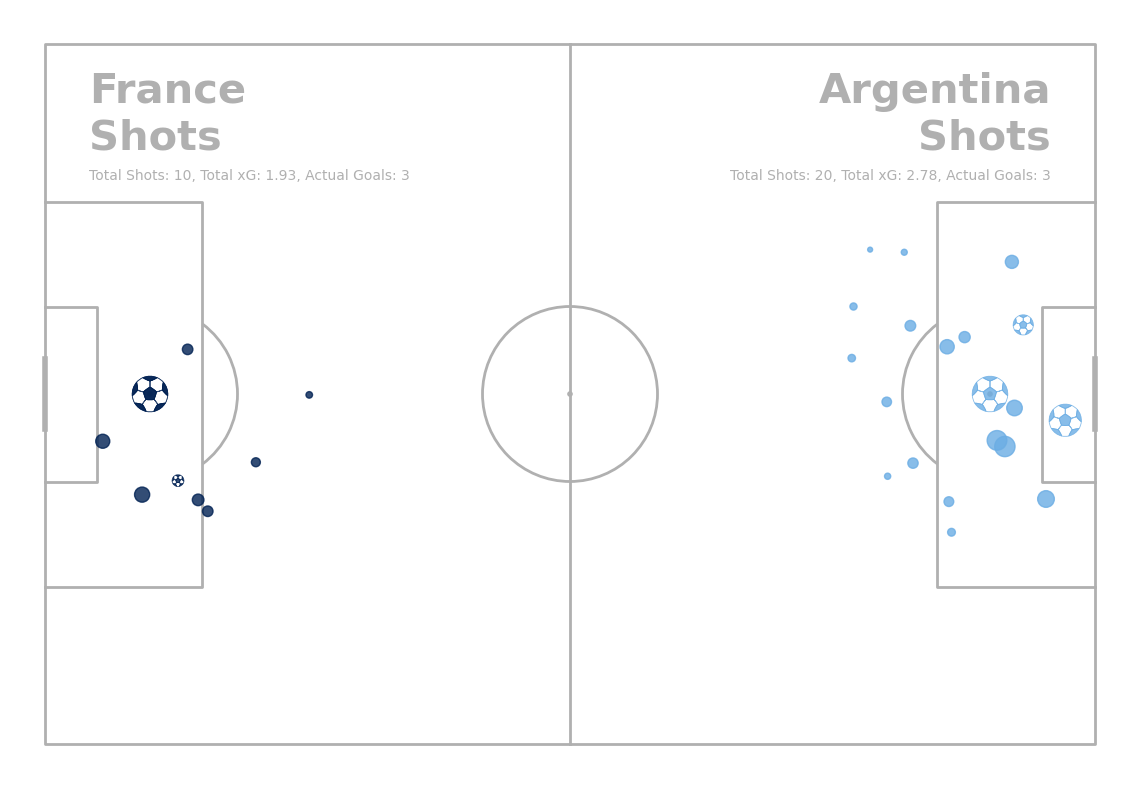

In [88]:
pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(12, 8))

mask_france_goal = (df_france['outcome_name'] == 'Goal')
mask_france_no_goal = (df_france['outcome_name'] != 'Goal')
mask_argentina_goal = (df_argentina['outcome_name'] == 'Goal')
mask_argentina_no_goal = (df_argentina['outcome_name'] != 'Goal')

# plot france no goal
sc1 = pitch.scatter(120-df_france[mask_france_no_goal].x, 80-df_france[mask_france_no_goal].y,
                    s=(df_france[mask_france_no_goal].our_xg * 1000),
                    c='#002153',
                    marker='o',
                    ax=ax, alpha=0.8)

# plot france goals
sc2 = pitch.scatter(120-df_france[mask_france_goal].x, 80-df_france[mask_france_goal].y,
                    s=(df_france[mask_france_goal].our_xg * 1000),
                    edgecolors='#002153',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax, alpha=0.8)

# plot argentina no goals
sc3 = pitch.scatter(df_argentina[mask_argentina_no_goal].x,df_argentina[mask_argentina_no_goal].y,
                    s=(df_argentina[mask_argentina_no_goal].our_xg * 1000),
                    c='#6bade4',
                    marker='o',
                    ax=ax, alpha=0.8)

# plot argentina goals
sc4 = pitch.scatter(df_argentina[mask_argentina_goal].x,df_argentina[mask_argentina_goal].y,
                    s=(df_argentina[mask_argentina_goal].our_xg * 1000),
                    edgecolors='#6bade4',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax, alpha=0.8)

ax.text(x=5, y=8, s='France\nShots',
              size=30,
              color=pitch.line_color,
              va='center', ha='left', weight='bold')
ax.text(x=5, y=15, s='Total Shots: {}, Total xG: {}, Actual Goals: {}'.format(len(df_france),
                                                                                         round(df_france.our_xg.sum(), 2),
                                                                                         df_france[mask_france_goal].shape[0]),
              size=10,
              color=pitch.line_color,
              va='center', ha='left')

ax.text(x=115, y=8, s='Argentina\nShots',
              size=30,
              color=pitch.line_color,
              va='center', ha='right', weight='bold')
ax.text(x=115, y=15, s='Total Shots: {}, Total xG: {}, Actual Goals: {}'.format(len(df_argentina),
                                                                                         round(df_argentina.our_xg.sum(), 2),
                                                                                         df_argentina[mask_argentina_goal].shape[0]),
              size=10,
              color=pitch.line_color,
              va='center', ha='right')

In [89]:
a = pd.DataFrame(columns=['end_y', 'end_z', 'outcome_name'])

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4)
  shots_temp = df_matches[id]['event'].loc[mask_shot, ['end_y', 'end_z', 'outcome_name']]
  a = pd.concat([a, shots_temp]).reset_index(drop=True)

In [90]:
a.outcome_name.unique()

array(['Blocked', 'Saved', 'Off T', 'Post', 'Goal', 'Wayward',
       'Saved to Post', 'Saved Off Target'], dtype=object)

In [91]:
a[a.outcome_name == 'Post']

,end_y,end_z,outcome_name
4,36.1,0.6,Post
79,36.1,0.7,Post
88,43.1,2.8,Post
160,36.0,0.4,Post
165,36.0,1.0,Post
175,36.1,2.7,Post
188,39.1,2.8,Post
318,44.0,1.3,Post
369,36.6,2.9,Post
471,36.1,0.7,Post


In [92]:
mask_on_target = (a.end_y <= 44) & (a.end_y >= 36) & (a.end_z <= 2.8)

In [93]:
a = a[mask_on_target].reset_index(drop=True)

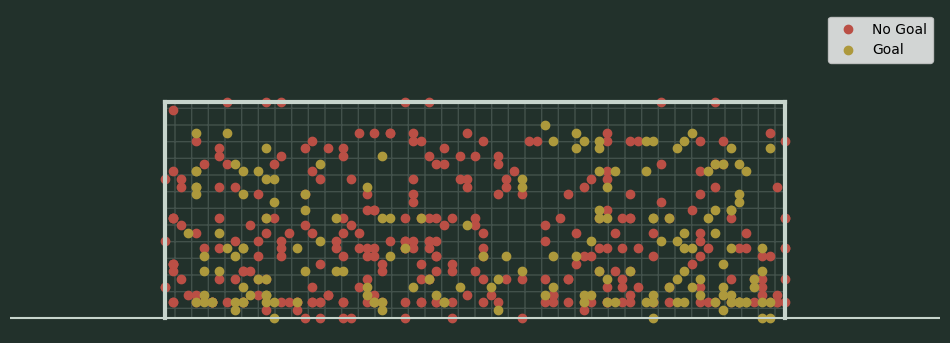

In [94]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='#22312b')
fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[0,0], color='#c7d5cc', linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color='#c7d5cc', linewidth=3)
plt.plot([44,44],[0,2.8], color='#c7d5cc', linewidth=3)
plt.plot([36,36],[0,2.8], color='#c7d5cc', linewidth=3)
#Goal net
plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.2))

#Tidy Axes
plt.axis('off')

goal_mask = a.outcome_name == 'Goal'
no_goal_mask = a.outcome_name != 'Goal'
sc1 = plt.scatter(a[no_goal_mask].end_y, a[no_goal_mask].end_z,
                    marker='o', color='#ba4f45', label='No Goal')
sc2 = plt.scatter(a[goal_mask].end_y, a[goal_mask].end_z,
                    marker='o', color='#ad993c', label='Goal')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
plt.legend()

plt.show()

In [95]:
a_zone = a.copy()

In [96]:
def zone(row):
  if row['end_y'] > 36 and row['end_y'] < 44 and row['end_z'] < 2.8:
    if row['end_y'] < 36+8/3:
      zone_h = 'left'
    elif row['end_y'] >= 36+8/3 and row['end_y'] < 36+2*8/3:
      zone_h = 'center'
    else:
      zone_h = 'right'

    if row['end_z'] < 2.8/2:
      zone_v = 'bottom'
    else:
      zone_v = 'top'
    zone = zone_v+' '+zone_h
    return zone
  else:
    return np.nan

In [97]:
a_zone['zone'] = a_zone.apply(lambda x:zone(x), axis=1)

In [98]:
mask_goal = a_zone['outcome_name']=='Goal'

In [99]:
a_zone.zone.value_counts()

bottom left      115
bottom right     114
bottom center     94
top right         47
top left          45
top center        39
Name: zone, dtype: int64

In [100]:
a_zone.loc[mask_goal].zone.value_counts()

bottom right     54
bottom left      37
bottom center    26
top right        25
top left         19
top center        7
Name: zone, dtype: int64

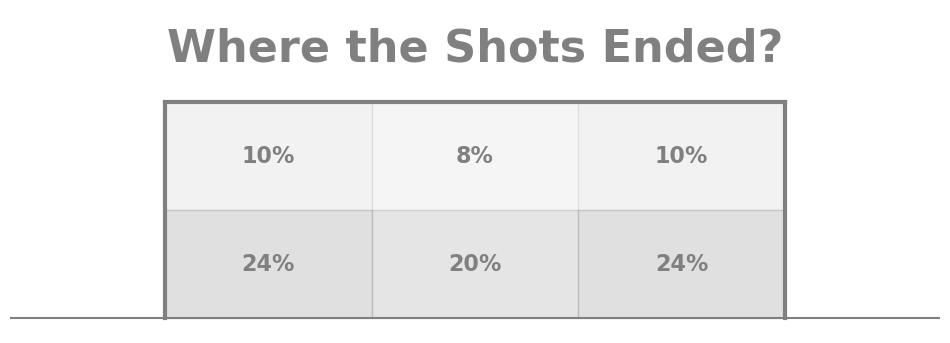

In [101]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white')
fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[0,0], color='gray', linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=3)
plt.plot([44,44],[0,2.8], color='gray', linewidth=3)
plt.plot([36,36],[0,2.8], color='gray', linewidth=3)
#Goal net
# plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

total_shot = len(a_zone)
percentage = {}
for zone in a_zone['zone'].unique():
  percentage[zone] = round(len(a_zone.loc[a_zone['zone']==zone])/total_shot, 2)

#zone
plt.gca().add_patch(Rectangle((36, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom left'])) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top left'])) # top left
plt.gca().add_patch(Rectangle((36+8/3, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom center'])) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top center'])) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom right'])) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top right'])) # top right


#Tidy Axes
plt.axis('off')

plt.text(x=40, y=3.5, s="Where the Shots Ended?", color='gray', fontsize=32, weight="bold", ha='center', va='center')

plt.text(x=36+8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+3*8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+3*8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+5*8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+5*8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')


plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

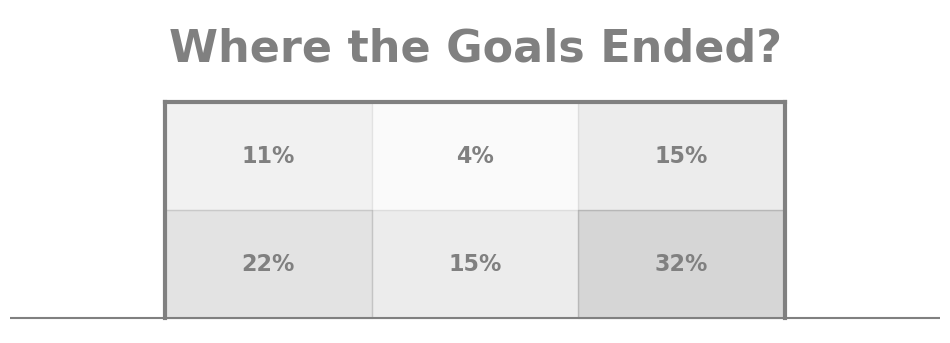

In [102]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white')
fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[0,0], color='gray', linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=3)
plt.plot([44,44],[0,2.8], color='gray', linewidth=3)
plt.plot([36,36],[0,2.8], color='gray', linewidth=3)
#Goal net
# plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

a_zone_masked = a_zone.loc[mask_goal]
total_shot = len(a_zone_masked)
percentage = {}
for zone in a_zone_masked['zone'].unique():
  percentage[zone] = round(len(a_zone_masked.loc[a_zone_masked['zone']==zone])/total_shot, 2)

#zone
plt.gca().add_patch(Rectangle((36, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom left'])) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top left'])) # top left
plt.gca().add_patch(Rectangle((36+8/3, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom center'])) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top center'])) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom right'])) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top right'])) # top right


#Tidy Axes
plt.axis('off')

plt.text(x=40, y=3.5, s="Where the Goals Ended?", color='gray', fontsize=32, weight="bold", ha='center', va='center')
plt.text(x=36+8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+3*8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+3*8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+5*8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+5*8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')


plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

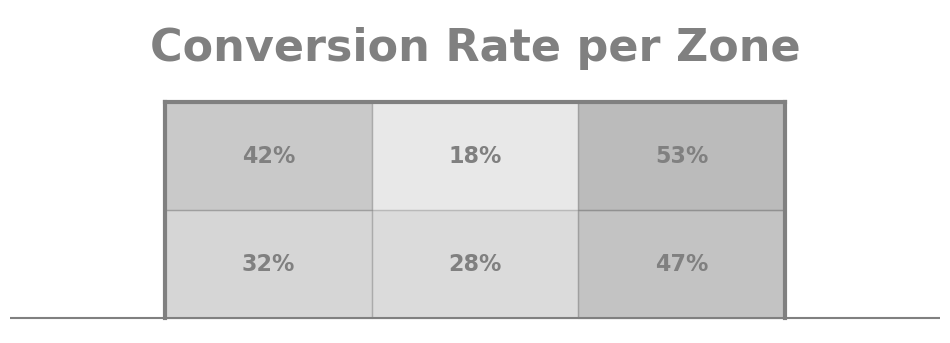

In [103]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='white')
fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[0,0], color='gray', linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color='gray', linewidth=3)
plt.plot([44,44],[0,2.8], color='gray', linewidth=3)
plt.plot([36,36],[0,2.8], color='gray', linewidth=3)
#Goal net
# plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor='gray', hatch='+', alpha=0.2))

a_zone_masked = a_zone.loc[mask_goal]

percentage = {}
for zone in a_zone_masked['zone'].unique():
  total_shot = len(a_zone.loc[a_zone['zone']==zone])
  percentage[zone] = round(len(a_zone_masked.loc[a_zone_masked['zone']==zone])/total_shot, 2)

#zone
plt.gca().add_patch(Rectangle((36, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom left'])) # bottom left
plt.gca().add_patch(Rectangle((36, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top left'])) # top left
plt.gca().add_patch(Rectangle((36+8/3, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom center'])) # bottom center
plt.gca().add_patch(Rectangle((36+8/3, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top center'])) # top center
plt.gca().add_patch(Rectangle((36+2*8/3, 0), 8/3, 2.8/2, color='gray', alpha=percentage['bottom right'])) # bottom right
plt.gca().add_patch(Rectangle((36+2*8/3, 2.8/2), 8/3, 2.8/2, color='gray', alpha=percentage['top right'])) # top right


#Tidy Axes
plt.axis('off')

plt.text(x=40, y=3.5, s="Conversion Rate per Zone", color='gray', fontsize=32, weight="bold", ha='center', va='center')
plt.text(x=36+8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top left'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+3*8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+3*8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top center'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+5*8/6, y=2.8/4, s="{}%".format(round(100*percentage['bottom right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')
plt.text(x=36+5*8/6, y=3*2.8/4, s="{}%".format(round(100*percentage['top right'])), color='gray', fontsize=16, weight="bold", ha='center', va='center')


plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
# plt.legend()

plt.show()

In [104]:
a['goal'] = a.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [105]:
a['end_y_center'] = a.apply(lambda row:abs(40-row['end_y']), axis=1)

In [106]:
a['end_z_center'] = a.apply(lambda row:abs(1.4-row['end_z']), axis=1)

In [107]:
fig = alt.Chart(a).mark_point().encode(x='end_y_center',y='goal')

fig + fig.transform_regression('end_y_center','goal').mark_line()

alt.LayerChart(...)

In [108]:
fig = alt.Chart(a).mark_point().encode(x='end_z_center',y='goal')

fig + fig.transform_regression('end_z_center','goal').mark_line()

alt.LayerChart(...)

In [109]:
X = a[['end_y_center', 'end_z_center']]
y = a['goal']
xgot_model = LogisticRegression()
xgot_model.fit(X, y)
y_pred = xgot_model.predict_proba(X)[:,-1]
metrics.r2_score(y, y_pred)

0.023626693073164562

In [110]:
import pickle
filename = 'xgot_model.sav'
pickle.dump(xgot_model, open(filename, 'wb'))

In [111]:
def calculate_xgot(row):
  if (row.end_y <= 44) & (row.end_y >= 36) & (row.end_z <= 2.8): # if on target
    end_y_center = abs(40-row['end_y'])
    end_z_center = abs(1.4-row['end_z'])
    X = [[end_y_center, end_z_center]]
    xgot = xgot_model.predict_proba(X)[:, 1][0]
    return xgot
  else:
    return np.nan

In [112]:
df_summary = df_match[['match_id', 'home_team_name', 'away_team_name']].copy()

home_goal = []
home_xg = []
home_xg_sb = []
home_xgot = []

away_goal = []
away_xg = []
away_xg_sb = []
away_xgot = []

for i, id in enumerate(df_match.match_id):
  df_evaluate = df_matches[id]['event'][df_matches[id]['event']['type_name'] == 'Shot']

  # take only open play
  evaluate_mask = (df_evaluate.type_name == 'Shot') & (df_evaluate.period	<= 4)
  df_evaluate = df_evaluate[evaluate_mask]

  # calculate xg per shot
  df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg_adv(row), axis=1)
  df_evaluate['our_xgot'] = df_evaluate.apply(lambda row:calculate_xgot(row), axis=1)

  # home team
  df_home = df_evaluate[df_evaluate.team_name == df_match['home_team_name'][i]]
  home_goal.append(len(df_home[df_home.outcome_name == 'Goal']))
  home_xg.append(df_home.our_xg.sum())
  home_xg_sb.append(df_home.shot_statsbomb_xg.sum())
  home_xgot.append(df_home.our_xgot.sum())

  # away team
  df_away = df_evaluate[df_evaluate.team_name == df_match['away_team_name'][i]]
  away_goal.append(len(df_away[df_away.outcome_name == 'Goal']))
  away_xg.append(df_away.our_xg.sum())
  away_xg_sb.append(df_away.shot_statsbomb_xg.sum())
  away_xgot.append(df_away.our_xgot.sum())

df_summary['home_goal'] = home_goal
df_summary['home_xg'] = home_xg
df_summary['home_xg_sb'] = home_xg_sb
df_summary['home_xgot'] = home_xgot

df_summary['away_goal'] = away_goal
df_summary['away_xg'] = away_xg
df_summary['away_xg_sb'] = away_xg_sb
df_summary['away_xgot'] = away_xgot

In [113]:
df_summary.head(10)

,match_id,home_team_name,away_team_name,home_goal,home_xg,home_xg_sb,home_xgot,away_goal,away_xg,away_xg_sb,away_xgot
0,3857256,Serbia,Switzerland,2,1.493781,1.189004,1.922890,3,2.483093,3.103515,2.013846
1,3869151,Argentina,Australia,2,1.324700,1.481579,1.569854,0,0.586725,0.426118,0.000000
2,3857257,Australia,Denmark,1,0.404915,0.469723,1.584213,0,1.326828,0.737155,0.297602
3,3857258,Brazil,Serbia,2,1.960283,2.123890,3.308391,0,0.209117,0.163327,0.000000
4,3857288,Tunisia,Australia,0,1.316651,1.052170,1.387297,1,0.490532,0.359038,0.712290
5,3857267,Ecuador,Senegal,1,1.102636,1.001663,1.350769,2,1.751185,1.707465,1.233852
6,3869321,Netherlands,Argentina,2,0.693612,0.569538,0.762193,2,1.622771,1.939197,2.266626
7,3857287,Uruguay,South Korea,0,0.634220,0.417294,1.401714,0,0.609650,0.492993,0.000000
8,3869486,Morocco,Portugal,1,0.848070,0.972023,0.709264,0,0.847005,0.744121,0.963063
9,3869685,Argentina,France,3,2.775122,2.758306,2.584436,3,1.928040,2.272618,1.602283


In [114]:
new_features = ['player_name', 'x', 'y', 'outcome_name', 'sub_type_name', 'body_part_name', 'under_pressure', 'technique_name', 'shot_statsbomb_xg', 'end_y', 'end_z']
df_shot_player = pd.DataFrame(columns=new_features)

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4)
  shots_temp = df_matches[id]['event'].loc[mask_shot, new_features]
  df_shot_player = pd.concat([df_shot_player, shots_temp]).reset_index(drop=True)

In [115]:
df_shot_player.head()

,player_name,x,y,outcome_name,sub_type_name,body_part_name,under_pressure,technique_name,shot_statsbomb_xg,end_y,end_z
0,Granit Xhaka,96.0,38.8,Blocked,Open Play,Left Foot,NaN,Half Volley,0.036566,38.5,NaN
1,Breel-Donald Embolo,113.1,40.7,Saved,Open Play,Left Foot,NaN,Half Volley,0.353289,40.6,1.6
2,Granit Xhaka,103.8,41.9,Saved,Open Play,Right Foot,NaN,Half Volley,0.069527,39.1,1.0
3,Nikola Milenković,112.2,36.8,Off T,Open Play,Head,NaN,Normal,0.081609,35.3,3.5
4,Andrija Živković,97.8,51.5,Post,Open Play,Left Foot,NaN,Normal,0.030002,36.1,0.6


In [116]:
df_shot_player['our_xg'] = df_shot_player.apply(lambda row:calculate_xg_adv(row), axis=1)
df_shot_player['our_xgot'] = df_shot_player.apply(lambda row:calculate_xgot(row), axis=1)

In [117]:
df_shot_player['goal'] = df_shot_player.apply(lambda row:1 if row['outcome_name'] == 'Goal' else 0, axis=1)

In [118]:
player_summary = df_shot_player.groupby('player_name')[['our_xg', 'our_xgot', 'shot_statsbomb_xg', 'goal']].sum().reset_index()

In [119]:
alt.Chart(player_summary).mark_circle(size=60).encode(
    x='our_xgot:Q',
    y='our_xg:Q',
    color=alt.Color('goal', scale=alt.Scale(range=["#ff8000", "#00b020"])),
    tooltip=['player_name', 'our_xg', 'our_xgot', 'shot_statsbomb_xg', 'goal']
).interactive()

alt.Chart(...)

In [120]:
alt.Chart(player_summary).mark_circle(size=60).encode(
    x='our_xgot:Q',
    y='shot_statsbomb_xg:Q',
    color=alt.Color('goal', scale=alt.Scale(range=["#ff8000", "#00b020"])),
    tooltip=['player_name', 'our_xg', 'our_xgot', 'shot_statsbomb_xg', 'goal']
).interactive()

alt.Chart(...)

In [121]:
player_summary['difference'] = player_summary['goal']-(player_summary['our_xg'] + player_summary['our_xgot'])/2

In [134]:
player_summary.sort_values('difference', ascending=False).head(70)

,player_name,our_xg,our_xgot,shot_statsbomb_xg,goal,difference
234,Kylian Mbappé Lottin,5.009529,3.898103,4.233252,8,3.546184
76,Cody Mathès Gakpo,0.401769,1.334861,0.562367,3,2.131685
210,Julián Álvarez,1.856296,2.095328,1.908327,4,2.024188
67,Bukayo Saka,0.934094,1.597887,0.579455,3,1.734009
339,Richarlison de Andrade,1.378970,1.154832,1.617659,3,1.733099
...,...,...,...,...,...,...
349,Romain Saïss,0.780682,0.327105,0.564952,1,0.446106
416,Young-Gwon Kim,0.769321,0.346133,0.689242,1,0.442273
328,Piotr Zieliński,0.568642,0.589570,0.583895,1,0.420894
333,Randal Kolo Muani,0.776777,0.387533,1.266869,1,0.417845


In [133]:
player_summary.sort_values('difference').head(100)

,player_name,our_xg,our_xgot,shot_statsbomb_xg,goal,difference
173,Jamal Musiala,1.439239,1.924107,1.152516,0,-1.681673
236,Lautaro Javier Martínez,1.787563,0.754142,2.121547,0,-1.270852
351,Romelu Lukaku Menama,1.770308,0.716523,1.684155,0,-1.243415
334,Raphael Dias Belloli,0.678755,1.254283,0.922931,0,-0.966519
195,Joshua Kimmich,0.392039,1.377405,0.334518,0,-0.884722
...,...,...,...,...,...,...
24,Ali Gholizadeh,0.048343,0.464910,0.042827,0,-0.256627
265,Martin Hongla Yma II,0.072231,0.438169,0.082379,0,-0.255200
211,Junya Ito,0.265924,0.231538,0.110597,0,-0.248731
336,Raphaël Varane,0.497228,0.000000,0.264401,0,-0.248614


In [124]:
mask_mbappe = df_shot_player['player_name'] == "Kylian Mbappé Lottin"
df_mbappe = df_shot_player.loc[mask_mbappe]

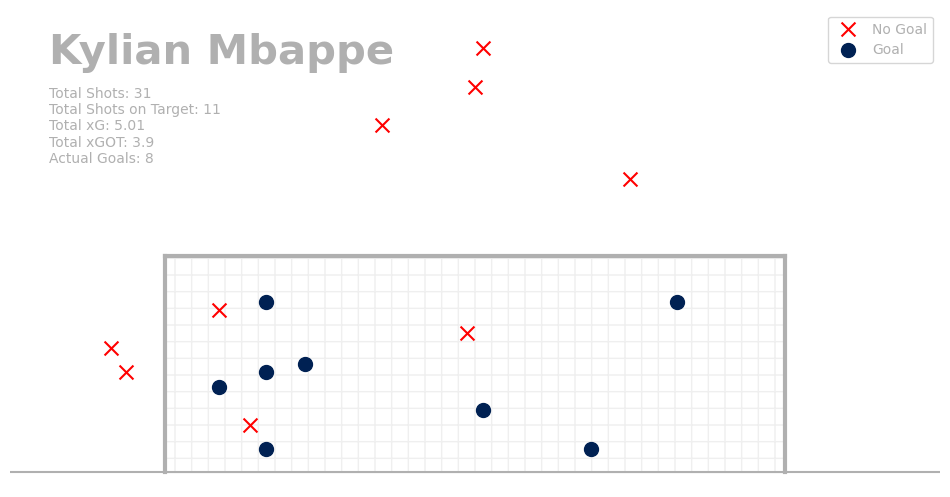

In [125]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure()
fig.set_size_inches(12, 6.2)

#Goal post lines
plt.plot([34,46],[0,0], color=pitch.line_color, linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color=pitch.line_color, linewidth=3)
plt.plot([44,44],[0,2.8], color=pitch.line_color, linewidth=3)
plt.plot([36,36],[0,2.8], color=pitch.line_color, linewidth=3)
#Goal net
plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor=pitch.line_color, hatch='+', alpha=0.2))

#Tidy Axes
plt.axis('off')

goal_mask = df_mbappe.outcome_name == 'Goal'
no_goal_mask = df_mbappe.outcome_name != 'Goal'
on_target_mask = (df_mbappe.end_y <= 44) & (df_mbappe.end_y >= 36) & (df_mbappe.end_z <= 2.8)
sc1 = plt.scatter(df_mbappe[no_goal_mask].end_y, df_mbappe[no_goal_mask].end_z, s=100,
                    marker='x', color='red', label='No Goal')
sc2 = plt.scatter(df_mbappe[goal_mask].end_y, df_mbappe[goal_mask].end_z, s=100,
                    marker='o', color='#002153', label='Goal')


plt.text(x=34.5, y=5.7, s="Kylian Mbappe", color=pitch.line_color, fontsize=30, weight="bold", ha='left', va='top')
plt.text(x=34.5, y=5, s='Total Shots: {}\nTotal Shots on Target: {}\nTotal xG: {}\nTotal xGOT: {}\nActual Goals: {}'.format(len(df_mbappe),
                                                                                                                len(df_mbappe[on_target_mask]),
                                                                                         round(df_mbappe.our_xg.sum(), 2),
                                                                                         round(df_mbappe.our_xgot.sum(), 2),
                                                                                         df_mbappe[goal_mask].shape[0]),
              size=10,
              color=pitch.line_color,
              va='top', ha='left')

plt.ylim(ymin=-0.2, ymax=6)
plt.xlim(xmin=34, xmax=46)
plt.legend(labelcolor=pitch.line_color)

plt.show()

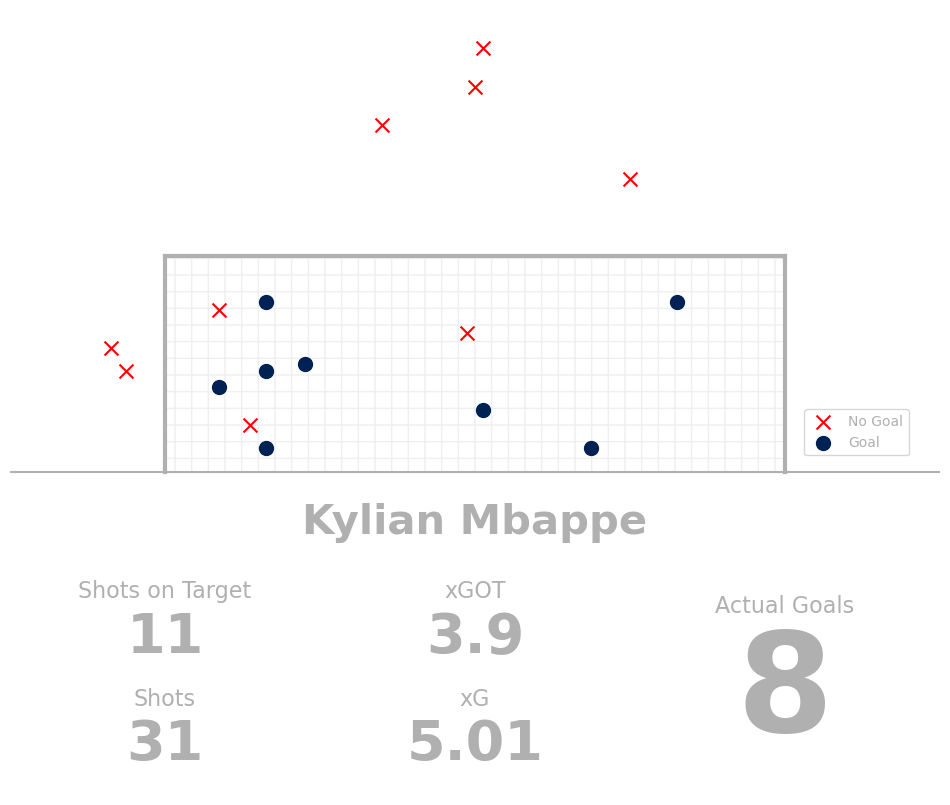

In [126]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure()
fig.set_size_inches(12, 10.2)

#Goal post lines
plt.plot([34,46],[0,0], color=pitch.line_color, linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color=pitch.line_color, linewidth=3)
plt.plot([44,44],[0,2.8], color=pitch.line_color, linewidth=3)
plt.plot([36,36],[0,2.8], color=pitch.line_color, linewidth=3)
#Goal net
plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor=pitch.line_color, hatch='+', alpha=0.2))

#Tidy Axes
plt.axis('off')

goal_mask = df_mbappe.outcome_name == 'Goal'
no_goal_mask = df_mbappe.outcome_name != 'Goal'
on_target_mask = (df_mbappe.end_y <= 44) & (df_mbappe.end_y >= 36) & (df_mbappe.end_z <= 2.8)
sc1 = plt.scatter(df_mbappe[no_goal_mask].end_y, df_mbappe[no_goal_mask].end_z, s=100,
                    marker='x', color='red', label='No Goal')
sc2 = plt.scatter(df_mbappe[goal_mask].end_y, df_mbappe[goal_mask].end_z, s=100,
                    marker='o', color='#002153', label='Goal')


plt.text(x=40, y=-0.4, s="Kylian Mbappe", color=pitch.line_color, fontsize=30, weight="bold", ha='center', va='top')

plt.text(x=36, y=-1.4, s="Shots on Target", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=36, y=-1.8, s="{}".format(len(df_mbappe[on_target_mask])), color=pitch.line_color, fontsize=40, weight="bold", ha='center', va='top')
plt.text(x=40, y=-1.4, s="xGOT", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=40, y=-1.8, s="{}".format(round(df_mbappe.our_xgot.sum(), 2)), color=pitch.line_color, fontsize=40, weight="bold", ha='center', va='top')
plt.text(x=44, y=-1.6, s="Actual Goals", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=44, y=-2.0, s="{}".format(df_mbappe[goal_mask].shape[0]), color=pitch.line_color, fontsize=100, weight="bold", ha='center', va='top')

plt.text(x=36, y=-2.8, s="Shots", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=36, y=-3.2, s="{}".format(len(df_mbappe)), color=pitch.line_color, fontsize=40, weight="bold", ha='center', va='top')
plt.text(x=40, y=-2.8, s="xG", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=40, y=-3.2, s="{}".format(round(df_mbappe.our_xg.sum(), 2)), color=pitch.line_color, fontsize=40, weight="bold", ha='center', va='top')


plt.ylim(ymin=-4.2, ymax=6)
plt.xlim(xmin=34, xmax=46)
plt.legend(labelcolor=pitch.line_color, bbox_to_anchor=(0.91, 0.5), loc="upper center")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_shots(df, player_name, pitch):
    mask_player = df['player_name'] == player_name
    df_player = df.loc[mask_player]

    # Create figure
    fig = plt.figure()
    fig.set_size_inches(12, 6.2)

    # Goal post lines
    plt.plot([34, 46], [0, 0], color=pitch.line_color, linewidth=1.5)
    plt.plot([36, 44], [2.8, 2.8], color=pitch.line_color, linewidth=3)
    plt.plot([44, 44], [0, 2.8], color=pitch.line_color, linewidth=3)
    plt.plot([36, 36], [0, 2.8], color=pitch.line_color, linewidth=3)
    # Goal net
    plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor=pitch.line_color, hatch='+', alpha=0.2))

    # Tidy Axes
    plt.axis('off')

    goal_mask = df_player['outcome_name'] == 'Goal'
    no_goal_mask = df_player['outcome_name'] != 'Goal'
    on_target_mask = (df_player['end_y'] <= 44) & (df_player['end_y'] >= 36) & (df_player['end_z'] <= 2.8)

    sc1 = plt.scatter(df_player[no_goal_mask]['end_y'], df_player[no_goal_mask]['end_z'], s=100, marker='x', color='red', label='No Goal')
    sc2 = plt.scatter(df_player[goal_mask]['end_y'], df_player[goal_mask]['end_z'], s=100, marker='o', color='#002153', label='Goal')

    plt.text(x=34.5, y=5.7, s=player_name, color=pitch.line_color, fontsize=30, weight="bold", ha='left', va='top')
    plt.text(x=34.5, y=5, s='Total Shots: {}\nTotal Shots on Target: {}\nTotal xG: {}\nTotal xGOT: {}\nActual Goals: {}'.format(len(df_player),
                                                                                                                              len(df_player[on_target_mask]),
                                                                                                                              round(df_player['our_xg'].sum(), 2),
                                                                                                                              round(df_player['our_xgot'].sum(), 2),
                                                                                                                              df_player[goal_mask].shape[0]),
              size=10, color=pitch.line_color, va='top', ha='left')

    plt.ylim(ymin=-0.2, ymax=6)
    plt.xlim(xmin=34, xmax=46)
    plt.legend(labelcolor=pitch.line_color)

    plt.show()

# Example usage
player_name = "Marcus Rashford"
plot_shots(df_shot_player, player_name, pitch)


In [ ]:
messi_info = df_shot_player[df_shot_player['player_name'] == 'Lionel Andrés Messi']
messi_player_id = messi_info['player_id'].iloc[0]